In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [5]:
numpy.random.seed(10)
df = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
df = df.values
df = df.astype('float32')

In [7]:
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df[:train_size,:], df[train_size:len(df),:]
print (len(train), len(test))

96 48


In [12]:
def make_dataset_from_timeseries(df, look_back=1):
    datax, datay = [], []
    for i in range(len(df) - look_back-1):
        a = df[i:(i+look_back), 0]
        datax.append(a)
        datay.append(df[i+look_back, 0])
    return numpy.array(datax), numpy.array(datay)

In [15]:
look_back = 3
trainX, trainY = make_dataset_from_timeseries(train, look_back=look_back)
testX, testY = make_dataset_from_timeseries(test, look_back=look_back)

In [ ]:
# data is now ready. Let's make some neural networks with Keras!

In [17]:
model = Sequential()
model.add(Dense(8,input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.fit(trainX, trainY, epochs=210, batch_size=2, verbose=2)

Epoch 1/210
0s - loss: 23985.5114
Epoch 2/210
0s - loss: 9193.5706
Epoch 3/210
0s - loss: 3459.6238
Epoch 4/210
0s - loss: 1635.7051
Epoch 5/210
0s - loss: 1217.4642
Epoch 6/210
0s - loss: 1120.4745
Epoch 7/210
0s - loss: 1118.2873
Epoch 8/210
0s - loss: 1113.0357
Epoch 9/210
0s - loss: 1082.6151
Epoch 10/210
0s - loss: 1084.4003
Epoch 11/210
0s - loss: 1060.1657
Epoch 12/210
0s - loss: 1030.3949
Epoch 13/210
0s - loss: 1011.9687
Epoch 14/210
0s - loss: 991.6894
Epoch 15/210
0s - loss: 981.0819
Epoch 16/210
0s - loss: 948.7062
Epoch 17/210
0s - loss: 932.7977
Epoch 18/210
0s - loss: 927.7674
Epoch 19/210
0s - loss: 930.9759
Epoch 20/210
0s - loss: 906.5619
Epoch 21/210
0s - loss: 884.7562
Epoch 22/210
0s - loss: 883.1228
Epoch 23/210
0s - loss: 845.5316
Epoch 24/210
0s - loss: 855.6750
Epoch 25/210
0s - loss: 813.3758
Epoch 26/210
0s - loss: 814.6201
Epoch 27/210
0s - loss: 796.0184
Epoch 28/210
0s - loss: 790.4942
Epoch 29/210
0s - loss: 768.1083
Epoch 30/210
0s - loss: 756.5610
Epoch

In [20]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print ('Training score: %0.4f RMSE' % numpy.sqrt(trainScore))

Training score: 22.0535 RMSE


In [21]:
testScore = model.evaluate(testX, testY, verbose=0)
print ('Testing score: %0.4f RMSE' % numpy.sqrt(trainScore))

Testing score: 22.0535 RMSE


In [24]:
# make predictions from
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# some shifting business -- for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# again shifting stuff, now for test data
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:,:] = numpy.nan
# what the hell is this next line?
testPredictPlot[len(trainPredict) + (look_back*2) + 1 : len(df) - 1, :] = testPredict

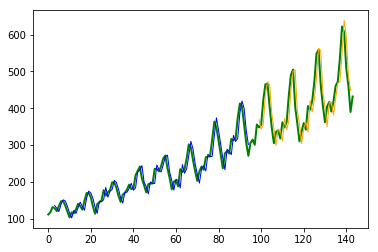

In [28]:
plt.plot(df, lw=2, color='green')
plt.plot(trainPredictPlot, lw=1, color='blue')
plt.plot(testPredictPlot, lw=1, color='orange')
plt.show()